In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=90):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [8]:
 #urls = search_images('monkey photos', max_images=3)
 #urls[0]

In [9]:
#from fastdownload import download_url
#dest = 'monkey.jpg'
#download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
#im = Image.open(dest)
#im.to_thumb(256,256)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
cloud_types = 'cirrus', 'cumulus', 'stratus', 'nimbus'
path = Path('clouds')
cloud_types


('cirrus', 'cumulus', 'stratus', 'nimbus')

In [11]:
if not path.exists():
    path.mkdir()
    for o in cloud_types:
        print(f'cloud type: {o}')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} cloud photo')
        download_images(urls=list(results), dest=dest)

cloud type: cirrus
Searching for 'cirrus cloud photo'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


cloud type: cumulus
Searching for 'cumulus cloud photo'
cloud type: stratus
Searching for 'stratus cloud photo'
cloud type: nimbus
Searching for 'nimbus cloud photo'


In [12]:
fns = get_image_files(path)
fns
!ls clouds
!cd clouds
!ls nimbus

#!rm -r clouds
!ls


cirrus	cumulus  nimbus  stratus
ls: cannot access 'nimbus': No such file or directory
clouds


In [13]:
failed = verify_images(fns)
failed

(#6) [Path('clouds/cumulus/a8c73215-4ec0-41da-b3cc-6f976e7dd328.jpg'),Path('clouds/stratus/519e6b4e-83eb-49bc-a96b-c929869648a1.jpg'),Path('clouds/cirrus/b9afc0c0-93cf-4691-8dce-18ce0e7a388e.jpg'),Path('clouds/cirrus/0e7ab6a8-a1d8-4557-bd5f-8bcf1f7838aa.jpg'),Path('clouds/cirrus/d4e5b8aa-7ca4-4ae4-83bb-5e3c81c17d03.jpg'),Path('clouds/cirrus/8917c63f-ceca-4fe6-8829-cbed7f806e0d.jpg')]

In [14]:
failed.map(Path.unlink);
!ls clouds/nimbus

00f7f551-105a-4b2b-8454-d10af8e63721.jpeg
05a7cfd3-1221-4dd1-b1d5-2f9d321e829c.jpg
0a8f2196-8dbb-4b0e-8578-fe69df279b72.jpg
0be47ab1-d52c-49cb-971c-74d3aa4c79c5.jpg
0fbb7b9a-99f8-45de-bd6e-33d24a1a1206.jpg
0ffa33a7-106e-48cc-92b1-5a18e52b9695.jpg
16b25fb6-3598-4bea-adf7-fc31eb2fcc20.jpg
18e181e4-bd2d-4b5a-906d-3e8d25e4cc9c.jpg
18ff636b-5f63-4de0-92a7-7f32fbf3a5f7.jpg
21ac7ab0-c1ac-4e02-af6c-4edc1507235d.jpg
21b4fb30-19ef-448d-a910-ce2dcd666c49.jpeg
24fefacb-6ed1-48ec-b5de-6af6473e9375.jpg
288c9fb2-70ee-4759-9a57-036e32c4ad81.jpg
2b8608fa-a800-4828-a6bc-95d15348efdc.jpg
2c23cf8b-a436-477c-8f35-67f7bb42d283.jpg
2dc801d3-d90e-45b3-8593-52187de96d1e.jpg
2eb403f5-2563-427d-9641-4f0207ad8cbd.jpg
333a9aee-57a7-4b7c-a56e-73072929382b.jpg
3640ab10-d86a-4d06-8d6e-a6a4dd460e9a.jpg
3900664a-d418-46fe-88f4-db89093fe7ab.JPG
3baee9ba-0b1d-4e76-8c91-3c047becb9a7.jpg
46189622-2710-4bca-8a9d-4a59e86e3091.jpg
47591187-310e-4098-9014-eb11b21e0a44.jpg
47f3b014-7c43-4a47-9836-d239355d3689.jpg
4f528f85-165d-

In [15]:
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=20),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = clouds.dataloaders(path)

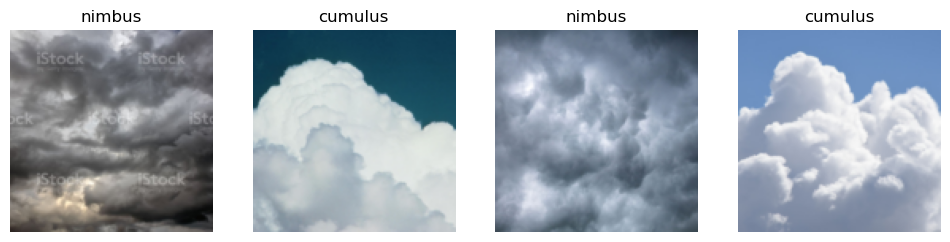

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)


In [18]:
clouds = clouds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = clouds.dataloaders(path)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 67.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.334904,1.833688,0.529412,01:04


epoch,train_loss,valid_loss,error_rate,time
0,1.485994,1.445873,0.500000,01:22
1,1.402551,1.291062,0.426471,01:24
2,1.232285,1.259526,0.382353,01:17
3,1.118867,1.241782,0.367647,00:55
4,1.039698,1.229738,0.338235,00:55
5,0.959724,1.168486,0.294118,00:55


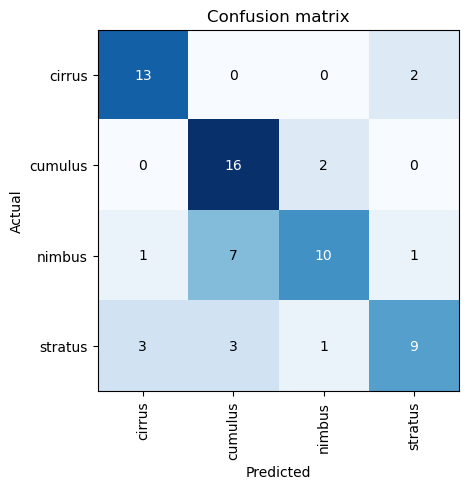

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

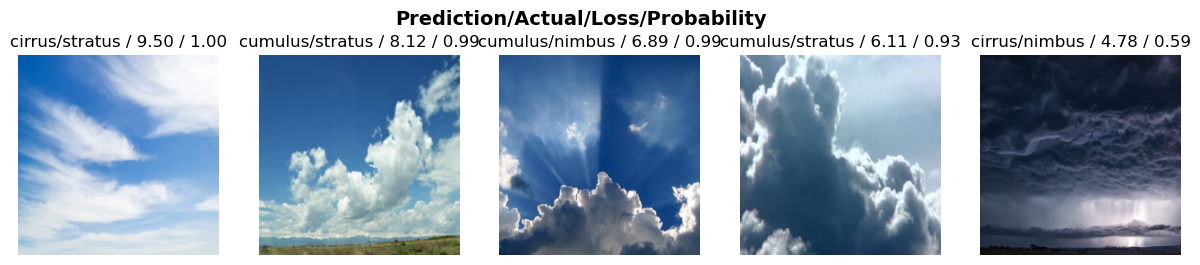

In [21]:
interp.plot_top_losses(5, nrows=1)


In [22]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [23]:
# delete selected for deletion
cleaner.delete()
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# move images for which we've selected a different category
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)


In [24]:
# export model
learn.export()

In [25]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
from fastai.learner import load_learner
learn_inf = load_learner('export.pkl')

In [33]:
# the predicted category in the same format originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category
learn_inf.predict('clouds/nimbus/00f7f551-105a-4b2b-8454-d10af8e63721.jpeg')
learn_inf.predict('clouds/cirrus/01ed2957-f525-4d5f-8f06-35cd5d5c0bd3.jpg')


('cirrus', tensor(0), tensor([9.9942e-01, 2.9071e-06, 6.8853e-05, 5.1321e-04]))

In [34]:
learn_inf.dls.vocab

['cirrus', 'cumulus', 'nimbus', 'stratus']